In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [3]:
# Import 'Chocolate bar rating 2022' dataset 

df = pd.read_csv(r'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 6 /df_choc_bar_rating_clean.csv', index_col = False)

In [5]:
df.head()

,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Year,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [7]:
%matplotlib inline

In [14]:
# Convert 'Cacao Percent' column in float to enable analyse 

df['Cocoa Percent'] = df['Cocoa Percent'].str.rstrip('%').astype(float) # % was removed as part of the conversion process 

In [20]:
df.head()

,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Year,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [25]:
df.corr()

/var/folders/x3/_5wv32sn4pld75r63yqchllh0000gp/T/ipykernel_82089/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,REF,Review Year,Cocoa Percent,Rating
Unnamed: 0,1.000000,0.008153,0.005655,0.032932,-0.004100
REF,0.008153,1.000000,0.993245,0.007346,0.116294
Review Year,0.005655,0.993245,1.000000,0.007029,0.118900
Cocoa Percent,0.032932,0.007346,0.007029,1.000000,-0.144569
Rating,-0.004100,0.116294,0.118900,-0.144569,1.000000


In [163]:
# Create a subset with relevant variables 

df_sub = df[['Cocoa Percent', 'Rating']]

Text(0.5, 1.0, 'Correlation Matrix')

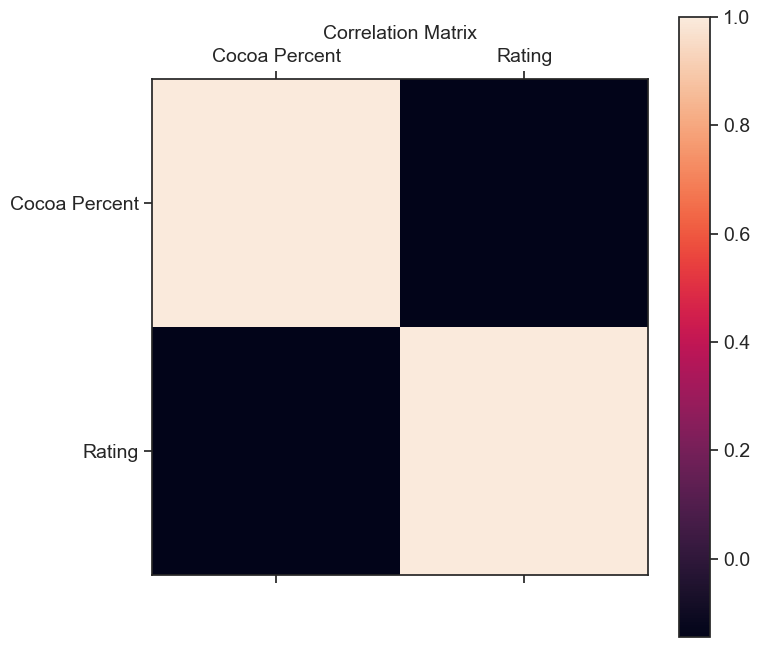

In [164]:
# Create a corr. matrix heatmap between 'Rating' and 'Cocao percent'

f = plt.figure(figsize=(8, 8)) # figure size"
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot\n",
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=0) # x axis labels\n",
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels\n",
cb = plt.colorbar() # add a colour legend (called colorbar)\n",
cb.ax.tick_params(labelsize=14) # add font size\n",
plt.title('Correlation Matrix', fontsize=14) # add title"



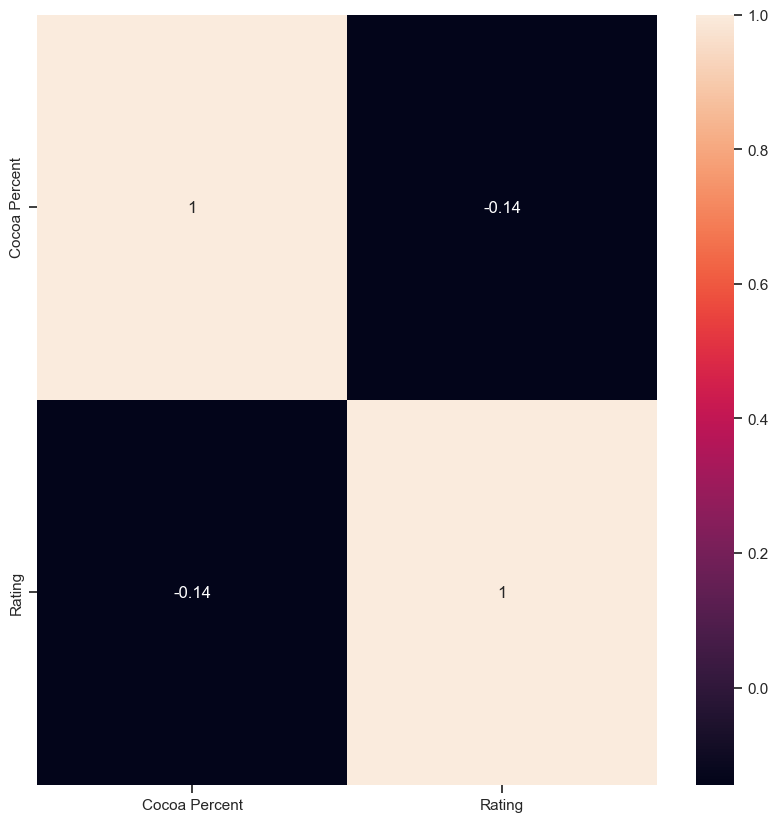

In [165]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots

f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

In [75]:
# The coef. -0.14 between those two variables shows that there is a negative relationship between them.



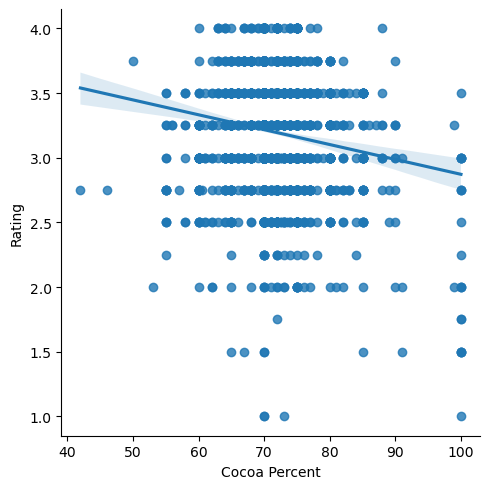

In [96]:
### Create a scatterplot for the 'Cocoa Percent' and 'Rating' in seaborn

sns.lmplot(x = 'Cocoa Percent', y = 'Rating', data = df)


In [97]:
# As displayed on the graph, we can notice that there is a no relationship between those two variables as there is no cluster around the line, the plots are scattered everywhere in the graph and the line lacks steepness.




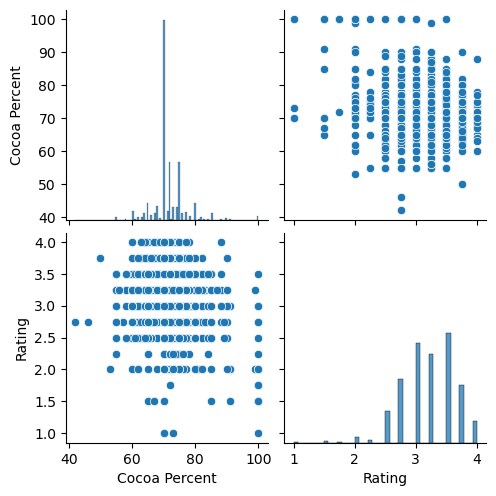

In [98]:
### Create a Pair Plots

g = sns.pairplot(df_sub)

In [101]:
# The graph shows no relationship between those variables, like the charts above, since the plots remain scattered in the charts. 



<Axes: xlabel='Cocoa Percent', ylabel='Count'>

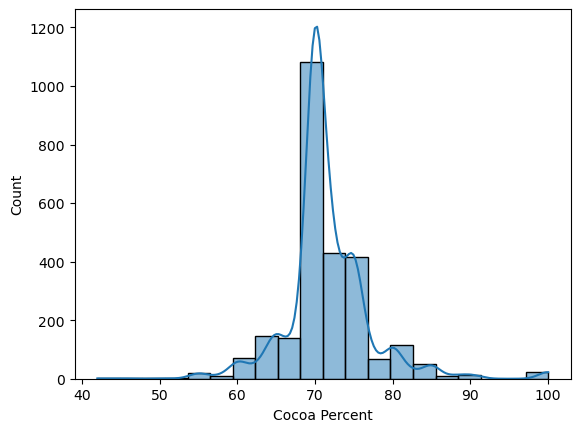

In [125]:
### Create a Categorical Plots

sns.histplot(df['Cocoa Percent'], bins = 20, kde = True)

In [122]:
df.loc[df['Cocoa Percent'] < 70, 'Flavor profile'] = 'Semi-bitter'

In [139]:
df.loc[(df['Cocoa Percent'] >= 70) & (df['Cocoa Percent'] <= 75), 'Flavor profile'] = 'Bitter'

In [140]:
df.loc[df['Cocoa Percent'] >= 75, 'Flavor profile'] = 'Extremely bitter'

In [141]:
df['Flavor profile'].value_counts(dropna = False)

Bitter              1567
Extremely bitter     624
Semi-bitter          397
Name: Flavor profile, dtype: int64

In [159]:
df['Cocoa Percent'].value_counts(dropna = False).sort_index()

42.0        1
46.0        1
50.0        1
53.0        1
55.0       16
56.0        2
57.0        1
58.0        8
60.0       46
60.5        1
61.0        7
62.0       16
63.0       15
64.0       37
65.0       93
66.0       28
67.0       35
68.0       75
69.0       13
70.0     1070
71.0       44
71.5        2
72.0      309
72.5        4
73.0       67
73.5        2
74.0       69
75.0      312
76.0       35
77.0       43
78.0       22
79.0        2
80.0       90
81.0        6
82.0       18
83.0        5
84.0        4
85.0       40
86.0        1
87.0        1
88.0        8
89.0        2
90.0        9
91.0        3
99.0        2
100.0      21
Name: Cocoa Percent, dtype: int64

In [144]:
df.columns

Index(['Unnamed: 0', 'REF', 'Company (Manufacturer)', 'Company Location',
       'Review Year', 'Country of Bean Origin',
       'Specific Bean Origin or Bar Name', 'Cocoa Percent', 'Ingredients',
       'Most Memorable Characteristics', 'Rating', 'Flavor profile'],
      dtype='object')

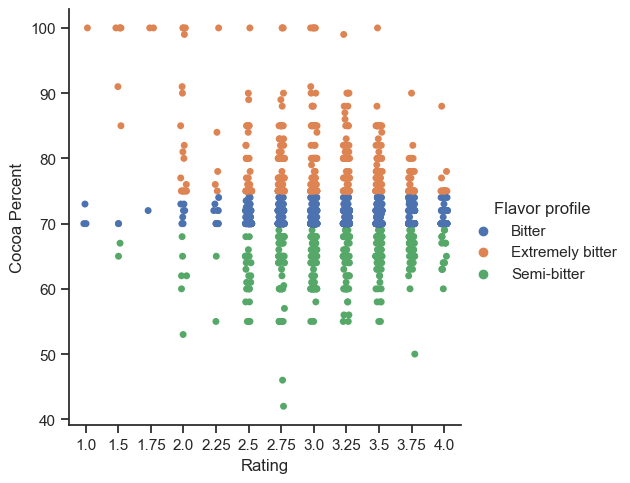

In [150]:
sns.set(style="ticks"),
g = sns.catplot(x= "Rating", y="Cocoa Percent", hue="Flavor profile", data=df)

In [146]:
# Based on the chart we can see that there is still no relationship between the variables. The % of the chocolate does not affect the grade. All flavors appear in a fair proportion in each category, though not equal in numbers,since the histogram charts revealed how inequal the sample selected of chocolate per % is. Indeed, we found in the distribution a large value counts for the 'bitter' category compared to the others. 


In [ ]:
### Business questions : 
#The following analyses showed that there was no correlation between the rating and cocoa percent. Indeed, my initial assumption, which was that the percentage had an impact on the grade, is confirmed by the charts to be null with a negative relationship -0.14. The hypotheses would be the following : (Null) There is no impact of the cocoa percent on the chocolate bar's rating v.s (Alternative) The cocoa percent have an impact on the chocolate bar's rating. For more insights, I would likely explore further the other variables (e.g ingredients or origins). One could be : U.S companies have better ratings, the U.S chocolate craft is then more appreciated.   





